Regression for denoising quasar spectra
---
## (a)
### (i)
let $W_{ii} = \frac{1}{2}w^{(i)}, W_{ij} = 0$

then $J(\theta) = (X\theta - y)^TW(X\theta - y)$

$\qquad = \Sigma_{i=1}^n\Sigma_{i=1}^nW_{ij}(X\theta - y)_{i}(X\theta - y)_{j}$

$\qquad = \Sigma_{i=j}W_{ii}(X\theta - y)_{i}(X\theta - y)_{i}$

$\qquad = \frac{1}{2}\Sigma_{i=1}^m w^{(i)}(\theta^T x^{(i)} - y^{(i)})^2$

## (ii)

Using the fact that
1. $W = W^T$
2. $\nabla_{A^T}tr(ABA^TC) = B^TA^TC^T + BA^TC$
3. $\nabla_{A}tr(A^T) = \nabla_{A}tr(A)$
4. $\nabla_{A}tr(BA) = B^T$

$0 = \nabla_\theta J(\theta) = \nabla_{\theta}(X\theta - y)^TW(X\theta - y)$

$\qquad\qquad = \nabla_\theta(\theta^TX^T - y^T)W(X\theta - y)$

$\qquad\qquad = \nabla_\theta(\theta^TX^TWX\theta - \theta^TX^TWy - y^TWX\theta + y^TWy)$

$\qquad\qquad = \nabla_\theta tr(\theta^TX^TWX\theta - \theta^TX^TWy - y^TWX\theta + y^TWy)$

$\qquad\qquad = \nabla_\theta(tr(\theta^TX^TWX\theta) - 2tr(y^TWX\theta))$

let $A = \theta^T, B = X^TWX, C=I$

then $\nabla_{A^T}tr(\theta^TX^TWX\theta) = 2X^TWX\theta$

$\qquad\qquad = 2X^TWX\theta - 2X^TWy$

set it to 0

then $2X^TWX\theta = 2X^TWy \rightarrow \theta = (X^TWX)^{-1}X^TWy$

### (iii)
$p(y|x;\theta) = \Pi_{i=1}^m \frac{1}{\sqrt{2\pi}\sigma^{(i)}} exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^{(i)^2}})$

$l(\theta) = \log p(y|x;\theta) = \Sigma_{i=1}^m (\log(\frac{1}{\sqrt{2\pi}\sigma^{(i)}}) -\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^{(i)^2}})$

So maximizing $l(\theta) \equiv $ minimizing $\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^{(i)^2}}$

Therefore $W_{ii} = \frac{1}{2\sigma^{(i)^2}}$
## (b)
### (i)

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
f = pd.read_csv('data/quasar_train.csv')
f.head()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
3,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
4,-0.107,0.328,0.681,2.500,0.083,1.876,2.359,1.122,0.584,0.835,...,1.427,2.685,1.152,1.365,0.280,2.246,1.249,1.304,0.578,0.831


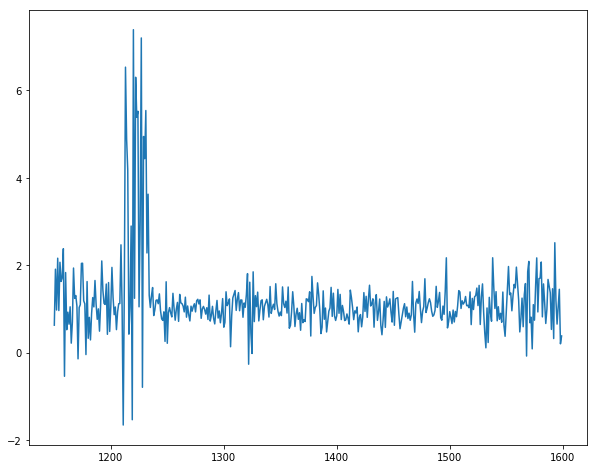

In [31]:
plt.figure(figsize=(10,8))
plt.plot(pd.to_numeric(f.columns), f.loc[0])

In [79]:
# set data 
fir_sample = pd.to_numeric(f.columns)
x_1 = np.vstack((np.ones(fir_sample.shape[0]), fir_sample)).T
y_1 = f.loc[0]

In [101]:
def optm(x, y, w=None):
    if isinstance(w, np.ndarray):
        return np.linalg.inv(x.T.dot(w).dot(x)).dot(x.T).dot(w).dot(y)
    else:
        return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

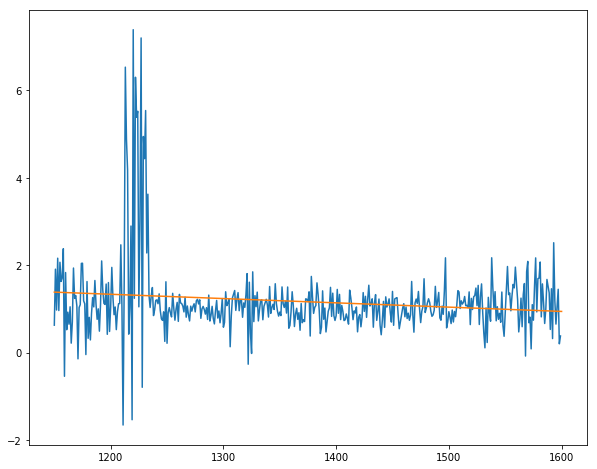

In [102]:
# plot the solution
theta_1 = optm(x_1, y_1)
x_1_plt = np.array([1150, 1600])
y_1_plt = theta_1[0] + theta_1[1] * x_1_plt
plt.figure(figsize=(10,8))
plt.plot(pd.to_numeric(f.columns), f.loc[0])
plt.plot(x_1_plt, y_1_plt)

### (ii)

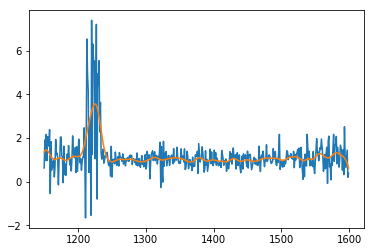

In [160]:
# def weight()
def weight(x, x_i, tau):
    return np.diag(np.exp(- (x[:,1] - x_i[1]) ** 2 / (2 * tau ** 2)))
def pred_loc_weight(x_1, y_1, tau):
    pred = []
    for k, x_i in enumerate(x_1):
        w = weight(x_1, x_i, tau)
        theta = optm(x_1, y_1, w).reshape((2, 1))
        pred.append(theta.T.dot(x_i)[0])
    return pred
plt.plot(pd.to_numeric(f.columns), f.loc[0])
plt.plot(x_1[:,1], pred_loc_weight(x_1, y_1, 5))

### (iii)

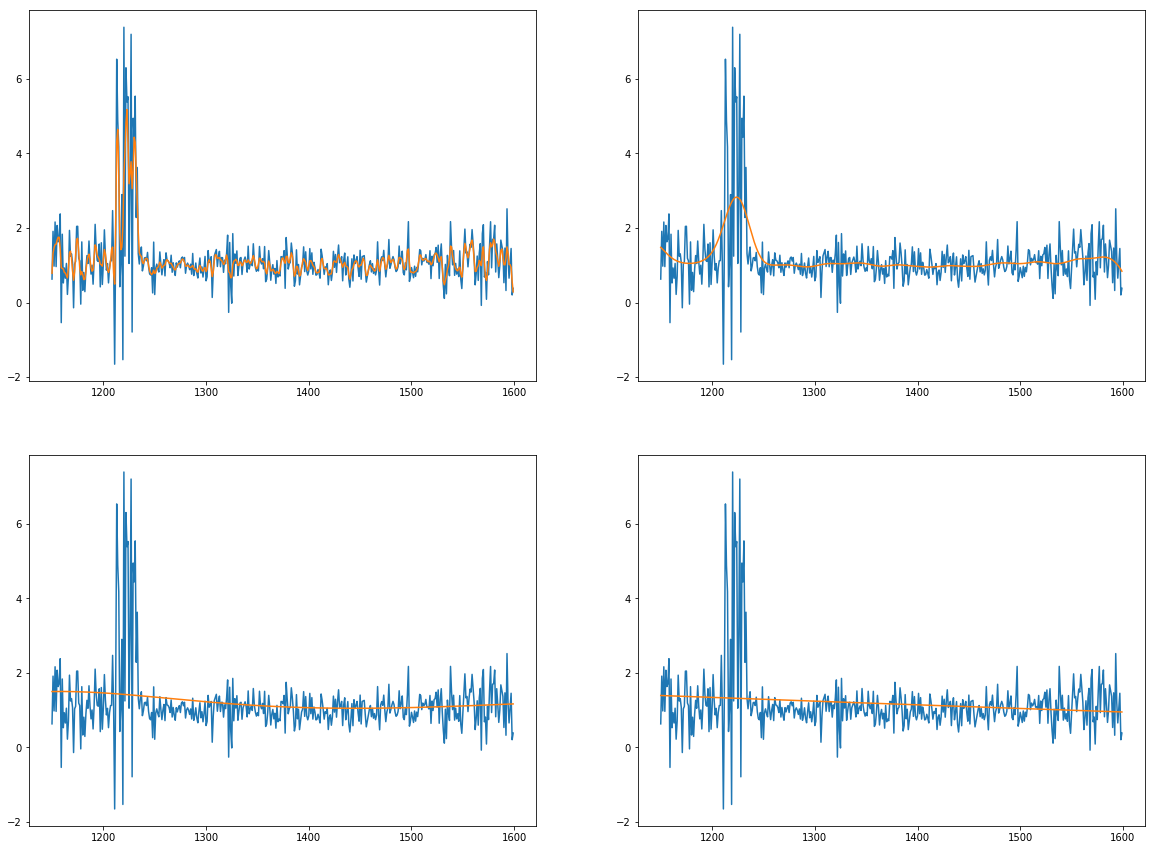

In [161]:
tau = [1, 10, 100, 1000]
plt.figure(figsize=(20,15))
for i, t in enumerate(tau):
    plt.subplot(2, 2, i + 1)
    plt.plot(pd.to_numeric(f.columns), f.loc[0])
    plt.plot(x_1[:,1], pred_loc_weight(x_1, y_1, t))

As $\tau$ increase, the prediction line varies les and is more different from the training data's x.

## (c)
### (i)

In [162]:
f_smooth = []
for (k, r) in f.iterrows():
    pred = pred_loc_weight(x_1, r.values, 5)
    f_smooth.append(pred)
    print(k, end=',')
f_smooth = pd.DataFrame(f_smooth, columns = f.columns)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,

## (ii)

In [185]:
wave = pd.to_numeric(f.columns)
wave_r = wave[wave >= 1300]
wave_l = wave[wave < 1200]

In [201]:
f_smooth.columns = wave
f_smooth_r = f_smooth[wave_r] 
f_smooth_l = f_smooth[wave_l] 

In [202]:
def ker(t):
    return np.max(1 - t, 0)

In [234]:
num_neighbor = 3
pred_train = []
error_train = []
for i, row in f_smooth_r.iterrows():
    dist = ((f_smooth_r - row)**2).sum(axis=1)
    max_d = dist.max()
    neighbor_dist = dist.sort_values()[:num_neighbor]
    p1 = np.sum([ker(d / max_d) * f_smooth_l.loc[k] for \
                 k, d in neighbor_dist.iteritems()], axis = 0)
    p2 = np.sum([ker(d / max_d) for \
                 k, d in neighbor_dist.iteritems()])
    f_left_hat = p1 / p2
    pred_train.append(f_left_hat)
    err = np.sum((f_left_hat - f_smooth_l.loc[i])**2 )
    error_train.append(err)

In [235]:
np.mean(error_train)

1.0663958023558322

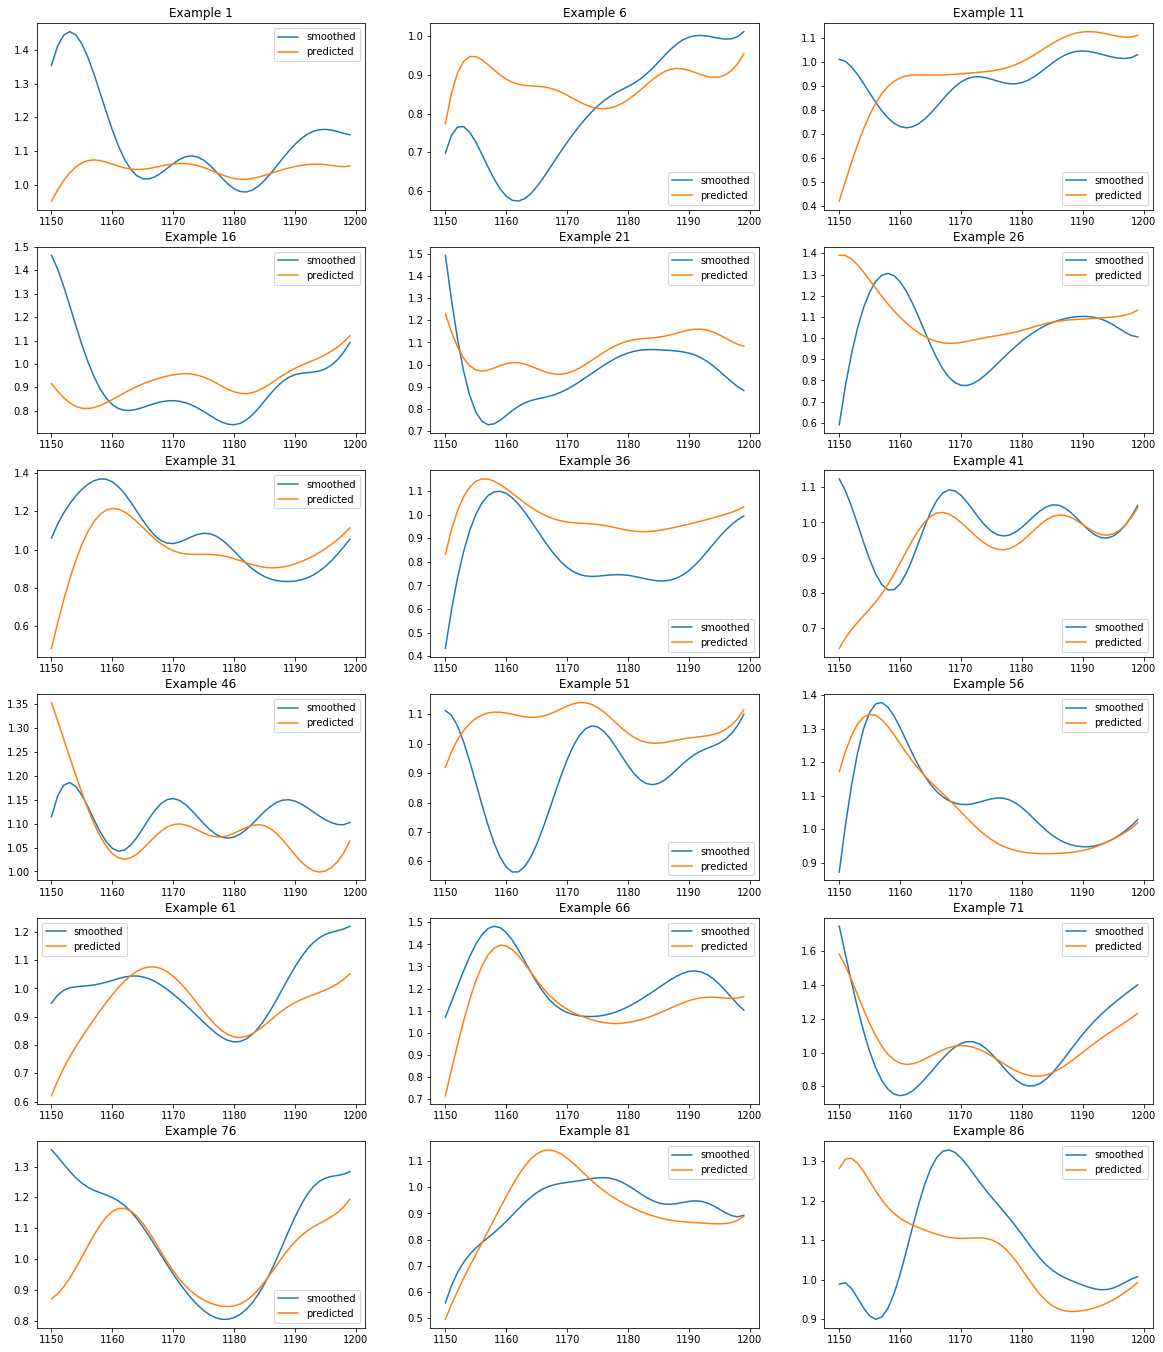

In [302]:
fig, axes = plt.subplots(6, 3, figsize=(20, 24))

for i, item in enumerate([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]):
    plt.subplot(6, 3, i + 1)
    plt.plot(wave_l, f_smooth_l.loc[item], label='smoothed')
    plt.plot(wave_l, pred_train[item], label='predicted')
    plt.legend()
    plt.title('Example {}'.format(item + 1))

In [264]:
# predict test data
f_test = pd.read_csv('data/quasar_test.csv')

In [284]:
# smooth the test data
f_smooth_test = []
for (k, r) in f_test.iterrows():
    pred = pred_loc_weight(x_1, r.values, 5)
    f_smooth_test.append(pred)
    print(k, end = ',')
f_smooth_test = pd.DataFrame(f_smooth_test, columns = wave)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,

In [295]:
f_test_l = f_smooth_test[wave_l]
f_test_r = f_smooth_test[wave_r]

In [299]:
error_test = []
pred_test = []
for i, row in f_test_r.iterrows():
    dist = ((f_smooth_r - row) ** 2).sum(axis = 1)
    max_d = dist.max()
    neighbor_dist = dist.sort_values()[:num_neighbor]
    p1 = np.sum([ker(d / max_d) * f_smooth_l.loc[k] for \
                 k, d in neighbor_dist.iteritems()], axis = 0)
    p2 = np.sum([ker(d / max_d) for \
                 k, d in neighbor_dist.iteritems()])
    f_left_hat = p1 / p2
    pred_test.append(f_left_hat)
    err = np.sum((f_left_hat - f_test_l.loc[i])**2 )
    error_test.append(err)

In [300]:
np.mean(error_test)

2.7099695793602576

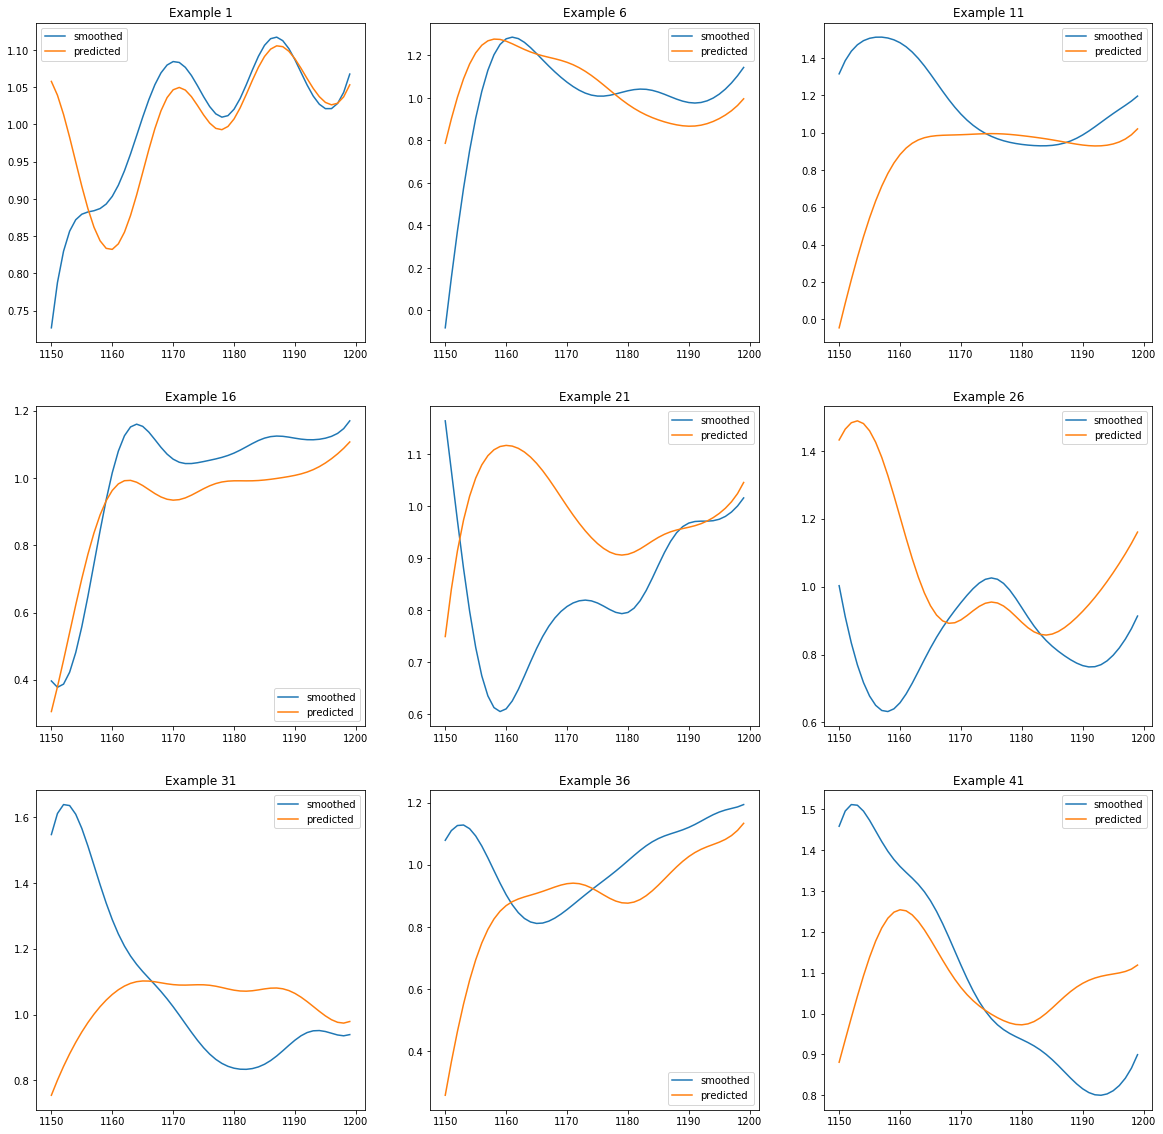

In [307]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, item in enumerate([0, 5, 10, 15, 20, 25, 30, 35, 40]):
    plt.subplot(3, 3, i + 1)
    plt.plot(wave_l, f_test_l.loc[item], label='smoothed')
    plt.plot(wave_l, pred_test[item], label='predicted')
    plt.legend()
    plt.title('Example {}'.format(item + 1))